# Wrangle and Analyze Data

## Udacity Data Analysis Nanodegree

In this project are presneted techniques related with data wrangling. The python notebook is composes as follow:


## Table of Content:

* [Gathering Data](#first-bullet)
* [Assessing Data](#second-bullet)
* [Cleaning Data](#third-bullet)
* [Merging Data](#seis-bullet)
* [Analyising Data](#fourth-bullet)
* [Visualizing Data](#fifth-bullet)

### Importing libraries

The following libraries are used for this project:

In [1]:
#Importing libraries
import wptools, os, glob, requests, json, tweepy, twython, datetime, operator
import pandas as pd
from tweepy import OAuthHandler
from timeit import default_timer as timer
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

## Gathering Data <a class="anchor" id="first-bullet"></a>

The data used in this project will be acquired from three different sources, fron an Udacity *csv* file, from the *Twitter's API* and from an *url* provided by Udacity. Each of three sources allows the implementation of different techniques used in the gathering of data.

### Gathering Data from Udacity recompiled WeRateDogs tweets

Gathering data provided from Udacity as a *csv* file, composed with the information of *WeRateDogs* tweets.

In [2]:
#Loading the tweets and their ids from the udavity given data
path = os.path.join(os.getcwd(),'WeRateDogs','twitter-archive-enhanced.csv')
df_tweets_given = pd.read_csv(path)

tweet_ids = df_tweets_given.tweet_id.values

### Gathering data from the *Twitter's* API

Creating a Twitter's API to get information related with *WeRateDogs* tweets.

In [4]:
#Creating an API object
consumer_key = 'XXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

The Twitter's API is queried using the Tweepy library in order to get information related with specific WeRateDogs tweets, using the tweets ids given by the Udacity. The Twitter's API generates a json file containing on each line information related with specific tweets and are saved as a text file called tweet_json.txt.

In [4]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids :
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile) #, outfile, sort_keys=True, indent=4)
            outfile.write('\n')
        except tweepy.TweepError as e:
            fails_dict[tweet_id] = e
            pass
end = timer()
print('Done')
print(end - start)
print(fails_dict)

Done
2099.6654303
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 842892208864923648: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 837012587749474308: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 827228250799742977: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 812747805718642688: TweepError([{'code': 

The tweet_json.txt file is used to get the information obtained from Twitter, using the *json* library as follow:

In [3]:
#Loading the tweets id's
path = os.path.join(os.getcwd(),'WeRateDogs','image-predictions.tsv')
df_predict = pd.read_csv(path, sep='\t')

df_list = []

#Reading each line of the text file
path = os.path.join(os.getcwd(),'tweet_json.txt')
with open(path, encoding='utf-8') as file:
    for line in file:
        tweetgot = json.loads(line)
        soup = BeautifulSoup(tweetgot['source'])
        df_list.append({'id': tweetgot['id'],
                        'retweet_count': tweetgot['retweet_count'],
                        'favorite_count': tweetgot['favorite_count'],
                        'full_text': tweetgot['full_text'],
                        'in_reply_to_status_id_str': tweetgot['in_reply_to_status_id_str'],
                        'in_reply_to_user_id': tweetgot['in_reply_to_user_id'],
                        'source': soup.find('a').contents[0]})        

#Creating a pandas dataframe with the obtained data
df = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count', 'full_text','in_reply_to_status_id_str','in_reply_to_user_id', 'source'])

### Gathering information from the image-prediction file

The last data obtained is from an url provided by Udacity, containing the classification of images related with various WeRateDogs tweets. The file contains the classification of dog breeds found on each of the tweet’s pictures. For this, the requests library is used as follow:

In [4]:
#Downloading data
folder_name = 'WeRateDogs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
#Creating a pandas dataframe with the obtained data
path = os.path.join(os.getcwd(),'WeRateDogs','image-predictions.tsv')    
df_tweets_pred = pd.read_csv(path, sep='\t')


## Assessing Data <a class="anchor" id="second-bullet"></a>

Once the data was obtained, the next step was to assess the data to find quality and tidiness issues. For this, external applications were used for a visual inspections of possible problems. The applications used were Microsoft Excel, Notepad and an online json editor. However, each of the following subsections are related with python techniques and libraries, focusing on:

- Visual inspections
- Finding problems with the types of data 
- Finding undefined values

### Assessing gathered Data from Udacity recompiled WeRateDogs tweets


#### Visual inspection


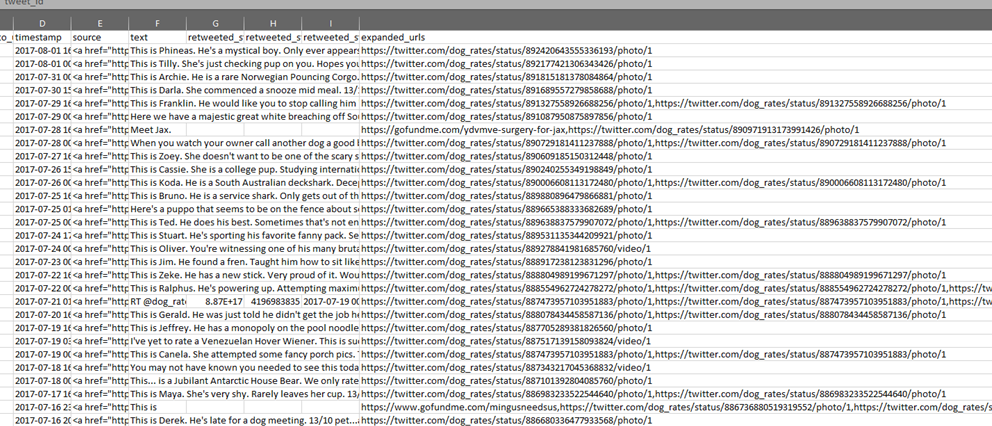

In [5]:
df_tweets_given.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Finding problems with the type of data 

In [6]:
df_tweets_given.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### Finding undefined values

In [7]:
df_tweets_given.isna().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

#### Problems found:


Quality issues:
- NaN values in in_reply_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and    retweeted_status_timestamp columns.
- Name of the column repeated in the row’s values for the doggo, floofer, pupper and puppo columns.
- The dog "stage" columns (doggo, floofer, pupper and puppo) can merge into one.
- The source column contains html code. 
- Remove duplicated expanded urls
- Remove short url from the Full text column
- Represent the rating as the division of the rating numerator by the rating denominator

-Tidiness issues:
- Rename columns to be more informative.
- timesamp column, too much information. It requires to be separated into two columns, date and time. 
- Split retweeted timespant into retweeted date and time


### Assessing gathered data from the *Twitter's* API

#### Visual inspection

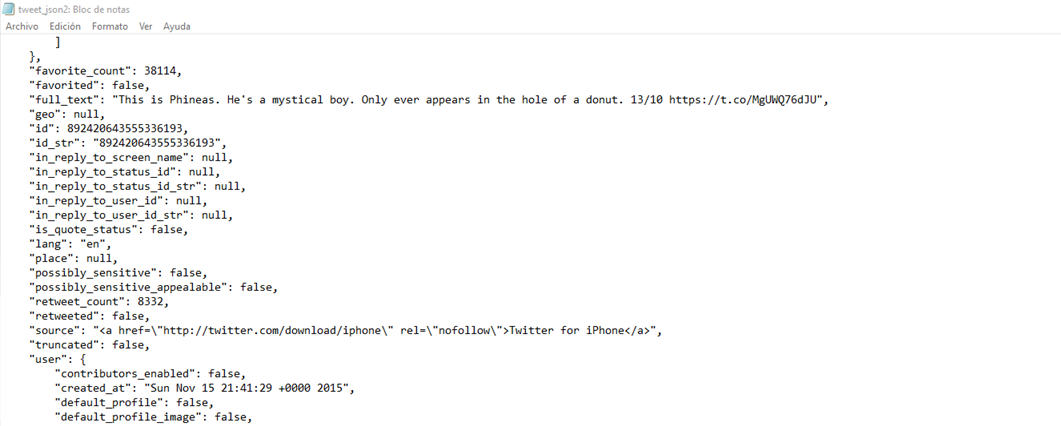

In [8]:
df.head()

,id,retweet_count,favorite_count,full_text,in_reply_to_status_id_str,in_reply_to_user_id,source
0,892420643555336193,8330,38090,This is Phineas. He's a mystical boy. Only eve...,None,NaN,Twitter for iPhone
1,892177421306343426,6154,32680,This is Tilly. She's just checking pup on you....,None,NaN,Twitter for iPhone
2,891815181378084864,4073,24594,This is Archie. He is a rare Norwegian Pouncin...,None,NaN,Twitter for iPhone
3,891689557279858688,8466,41449,This is Darla. She commenced a snooze mid meal...,None,NaN,Twitter for iPhone
4,891327558926688256,9168,39626,This is Franklin. He would like you to stop ca...,None,NaN,Twitter for iPhone


#### Finding problems with the type of data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 7 columns):
id                           2340 non-null int64
retweet_count                2340 non-null int64
favorite_count               2340 non-null int64
full_text                    2340 non-null object
in_reply_to_status_id_str    77 non-null object
in_reply_to_user_id          77 non-null float64
source                       2340 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 128.0+ KB


#### Finding undefined values

In [10]:
df.isna().any()

id                           False
retweet_count                False
favorite_count               False
full_text                    False
in_reply_to_status_id_str     True
in_reply_to_user_id           True
source                       False
dtype: bool

#### Problems found:


Quality issues:
- Remove undefined data in_reply_to_status_id_str, in_reply_to_user_id and in_reply_to_user_id_str.
- Remove short url from the Full text column

-Tidiness issues:
- Rename the columns to be more informative.


### Assessing gathered data from the image-prediction file


#### Visual inspection

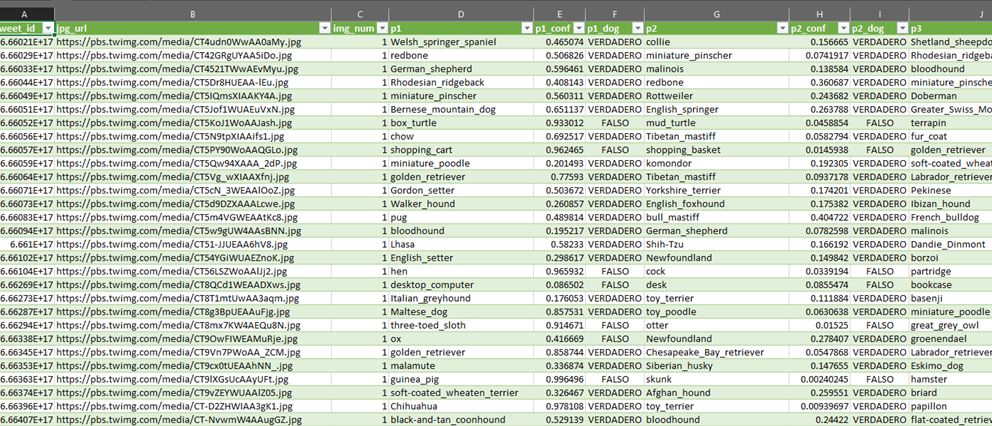

In [11]:
df_tweets_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Finding problems with the type of data 

In [12]:
df_tweets_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Finding undefined values

In [13]:
df_tweets_pred.isna().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

#### Problems found:


Quality issues:
- The names of the dogs have uncommon characters, Irish_setter. Moreover, all letters should be the same, in this case low capitals. 
- Reducing the precision to represent float numbers with 3 digits instead of 6.
- Changing Boolean values to logic for better future analysis

-Tidiness issues:
- Name of columns for the classifications are not to informative, improve.


## Cleaning Data <a class="anchor" id="third-bullet"></a>

The problems found in the previous section are fixed in this one, following the order presented. The gathered data is copied bofere fixing the problems to have a backup in case problem are presented. 

In [6]:
df_tweets_given_copy = df_tweets_given.copy()
df_tweets_pred_copy = df_tweets_pred.copy()
df_copy = df.copy()

### Cleaning Data obtained from Udacity recompiled WeRateDogs tweets


#### Define

 Cleaning the NaN values 

#### Code

In [7]:
df_tweets_given.fillna('', inplace=True)

#### Test

In [8]:
df_tweets_given.isna().any()

tweet_id                      False
in_reply_to_status_id         False
in_reply_to_user_id           False
timestamp                     False
source                        False
text                          False
retweeted_status_id           False
retweeted_status_user_id      False
retweeted_status_timestamp    False
expanded_urls                 False
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

#### Define

Combine dog stage columns

#### Code

In [9]:
#Removing None string values from the dataframe columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']

for column in columns:
    df_tweets_given[column].loc[df_tweets_given[column] == 'None'] = ''

C:\Users\alfonso\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#Concatenating strings from the following columns in DogStage and the droppoing the used columns
columns = ['doggo', 'floofer', 'pupper', 'puppo']

df_tweets_given.insert(13, 'DogStage', df_tweets_given[columns].apply(lambda x: ''.join(x), axis=1))
df_tweets_given.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [11]:
# Handle multiple stages
df_tweets_given.loc[df_tweets_given.DogStage == 'doggopupper', 'DogStage'] = 'doggo,pupper'
df_tweets_given.loc[df_tweets_given.DogStage == 'doggopuppo', 'DogStage'] = 'doggo,puppo'
df_tweets_given.loc[df_tweets_given.DogStage == 'doggofloofer', 'DogStage'] = 'doggo,floofer'

#### Test

In [12]:
df_tweets_given.DogStage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: DogStage, dtype: int64

#### Define

Removing html code from the source column

#### Code

In [13]:
for n in range(df_tweets_given.shape[0]):
    df_tweets_given.source[n] = BeautifulSoup(df_tweets_given.source[n]).find('a').contents[0]

C:\Users\alfonso\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [14]:
columns = ['tweet_id', 'source']
df_tweets_given[columns].head()

,tweet_id,source
0,892420643555336193,Twitter for iPhone
1,892177421306343426,Twitter for iPhone
2,891815181378084864,Twitter for iPhone
3,891689557279858688,Twitter for iPhone
4,891327558926688256,Twitter for iPhone


#### Define

Removing duplicated expanded urls

#### Code

In [18]:
for n in range(df_tweets_given.shape[0]):
    indice = df_tweets_given['expanded_urls'].loc[n].rfind(',')
    if indice != -1:
        df_tweets_given['expanded_urls'].loc[n] = df_tweets_given['expanded_urls'].loc[n][indice+1:]


#### Test

In [19]:
columns = ['tweet_id', 'expanded_urls']
df_tweets_given[columns].head()

,tweet_id,expanded_urls
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...


#### Define

Removing short urls from the Full text column 

#### Code

In [20]:
for n in range(df_tweets_given.shape[0]):
        indice = df_tweets_given['text'].loc[n].find('http')
        if indice != -1:
            df_tweets_given['text'].loc[n] = df_tweets_given['text'].loc[n][:indice]

#### Test

In [21]:
columns = ['tweet_id', 'text']
df_tweets_given[columns].head()

,tweet_id,text
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,This is Tilly. She's just checking pup on you....
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,This is Franklin. He would like you to stop ca...


#### Define 

Representing rating as the division of the rating numerator by the rating denominator

#### Code

In [22]:
Rating = df_tweets_given['rating_numerator'].div(df_tweets_given['rating_denominator'])
df_tweets_given.insert(10, 'Rating', Rating)
df_tweets_given.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [23]:
df_tweets_given[['tweet_id','Rating']].head()

,tweet_id,Rating
0,892420643555336193,1.3
1,892177421306343426,1.3
2,891815181378084864,1.2
3,891689557279858688,1.3
4,891327558926688256,1.2


#### Define

Renaming columns to be more informative

#### Code

In [24]:
df_tweets_given.columns = ['TweetID', 'InReplayToStatusID', 'InReplayToUserID', 'timestamp', 'Source', 'TweetText', 'RetweetStatusID', 'RetweetStatusUserID', 'retweeted_status_timestamp', 'TweetURL', 'Rating', 'DogName', 'DogStage']

#### Test

In [25]:
df_tweets_given.head()

,TweetID,InReplayToStatusID,InReplayToUserID,timestamp,Source,TweetText,RetweetStatusID,RetweetStatusUserID,retweeted_status_timestamp,TweetURL,Rating,DogName,DogStage
0,892420643555336193,,,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,,,,https://twitter.com/dog_rates/status/892420643...,1.3,Phineas,
1,892177421306343426,,,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,,,,https://twitter.com/dog_rates/status/892177421...,1.3,Tilly,
2,891815181378084864,,,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,,,,https://twitter.com/dog_rates/status/891815181...,1.2,Archie,
3,891689557279858688,,,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,,,,https://twitter.com/dog_rates/status/891689557...,1.3,Darla,
4,891327558926688256,,,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,,,,https://twitter.com/dog_rates/status/891327558...,1.2,Franklin,


#### Define

Splitting information contained in the timesamp column

#### Code

In [26]:
Date = []
Time = []
for n in range(df_tweets_given.shape[0]):
    Date.append(df_tweets_given['timestamp'].loc[n][0:10])
    Time.append(df_tweets_given['timestamp'].loc[n][11:18])
    
df_tweets_given.insert(3, 'Date', Date)
df_tweets_given.insert(4, 'Time', Time)
df_tweets_given.drop(['timestamp'], axis=1, inplace=True)

#### Test

In [27]:
columns = ['TweetID', 'Date', 'Time']
df_tweets_given[columns].head()

,TweetID,Date,Time
0,892420643555336193,2017-08-01,16:23:5
1,892177421306343426,2017-08-01,00:17:2
2,891815181378084864,2017-07-31,00:18:0
3,891689557279858688,2017-07-30,15:58:5
4,891327558926688256,2017-07-29,16:00:2


#### Define 
Splitting retweeted timespant into retweeted date and time

#### Code

In [28]:
Date = []
Time = []
for n in range(df_tweets_given.shape[0]):
    Date.append(df_tweets_given['retweeted_status_timestamp'].loc[n][0:10])
    Time.append(df_tweets_given['retweeted_status_timestamp'].loc[n][11:18])
    
df_tweets_given.insert(9, 'Retweeted Date', Date)
df_tweets_given.insert(10, 'Retweeted Time', Time)
df_tweets_given.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [29]:
columns = ['TweetID', 'Retweeted Date', 'Retweeted Time']
df_tweets_given[columns].head()

,TweetID,Retweeted Date,Retweeted Time
0,892420643555336193,,
1,892177421306343426,,
2,891815181378084864,,
3,891689557279858688,,
4,891327558926688256,,


### Cleaning Data obtained from the *Twitter's* API

#### Define 

Removing NaN values 

#### Code

In [30]:
#Replacing nan values
df.fillna('', inplace=True)

#### Test

In [31]:
df.isna().any()

id                           False
retweet_count                False
favorite_count               False
full_text                    False
in_reply_to_status_id_str    False
in_reply_to_user_id          False
source                       False
dtype: bool

#### Define 

Removing short url from the Full text column

#### Code

In [32]:
for n in range(df.shape[0]):
        indice = df['full_text'].loc[n].find('http')
        if indice != -1:
            df['full_text'].loc[n] = df['full_text'].loc[n][:indice]

#### Test

In [34]:
df.head()

,id,retweet_count,favorite_count,full_text,in_reply_to_status_id_str,in_reply_to_user_id,source
0,892420643555336193,8330,38090,This is Phineas. He's a mystical boy. Only eve...,,,Twitter for iPhone
1,892177421306343426,6154,32680,This is Tilly. She's just checking pup on you....,,,Twitter for iPhone
2,891815181378084864,4073,24594,This is Archie. He is a rare Norwegian Pouncin...,,,Twitter for iPhone
3,891689557279858688,8466,41449,This is Darla. She commenced a snooze mid meal...,,,Twitter for iPhone
4,891327558926688256,9168,39626,This is Franklin. He would like you to stop ca...,,,Twitter for iPhone


#### Define 

Renaming columns to be more informative.

#### Code

In [35]:
df.columns = ['TweetID', 'RetweetCount', 'FavoriteCount', 'TweetText','InReplayToStatusID', 'InReplayToUserID', 'Source']

#### Test

In [36]:
df.head()

,TweetID,RetweetCount,FavoriteCount,TweetText,InReplayToStatusID,InReplayToUserID,Source
0,892420643555336193,8330,38090,This is Phineas. He's a mystical boy. Only eve...,,,Twitter for iPhone
1,892177421306343426,6154,32680,This is Tilly. She's just checking pup on you....,,,Twitter for iPhone
2,891815181378084864,4073,24594,This is Archie. He is a rare Norwegian Pouncin...,,,Twitter for iPhone
3,891689557279858688,8466,41449,This is Darla. She commenced a snooze mid meal...,,,Twitter for iPhone
4,891327558926688256,9168,39626,This is Franklin. He would like you to stop ca...,,,Twitter for iPhone


### Cleaning Data obtained from the image-prediction file

#### Define 

Renaming predicted dogs names and changing all names to low capitals.

#### Code

In [37]:
for column in ['p1', 'p2', 'p3']:
    df_tweets_pred[column] = df_tweets_pred[column].str.replace('_', ' ')
    df_tweets_pred[column] = df_tweets_pred[column].str.lower()

#### Test

In [38]:
df_tweets_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Define

Reducing precision to represent float numbers with 3 digits

#### Code

In [39]:
df_tweets_pred = df_tweets_pred.round({'p1_conf': 3, 'p2_conf' : 3, 'p3_conf' : 3})

#### Test

In [40]:
df_tweets_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465,True,collie,0.157,True,shetland sheepdog,0.061,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,True,miniature pinscher,0.074,True,rhodesian ridgeback,0.072,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596,True,malinois,0.139,True,bloodhound,0.116,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408,True,redbone,0.361,True,miniature pinscher,0.223,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560,True,rottweiler,0.244,True,doberman,0.155,True


#### Define

Changing Boolean values to logic

#### Code

In [41]:
df_tweets_pred['p1_dog'].loc[df_tweets_pred['p1_dog']==True] = 1
df_tweets_pred['p1_dog'].loc[df_tweets_pred['p1_dog']==False] = 0
df_tweets_pred['p2_dog'].loc[df_tweets_pred['p2_dog']==True] = 1
df_tweets_pred['p2_dog'].loc[df_tweets_pred['p2_dog']==False] = 0
df_tweets_pred['p3_dog'].loc[df_tweets_pred['p3_dog']==True] = 1
df_tweets_pred['p3_dog'].loc[df_tweets_pred['p3_dog']==False] = 0

#### Test

In [42]:
columns = ['p1_dog', 'p2_dog', 'p3_dog']
df_tweets_pred[columns].head()

,p1_dog,p2_dog,p3_dog
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


#### Define

Renaming columns to be more informative.

#### Code

In [43]:
df_tweets_pred.columns = ['TweetID', 'ImageURL-JPGFormat', 'ImageNum', '1stPred', 'P1stPred', 'P1Dog', '2ndPred', 'P2ndPred', 'P2Dog', '3rdPred', 'P3rdPred', 'P3Dog']

#### Test

In [44]:
df_tweets_pred.head()

,TweetID,ImageURL-JPGFormat,ImageNum,1stPred,P1stPred,P1Dog,2ndPred,P2ndPred,P2Dog,3rdPred,P3rdPred,P3Dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465,1,collie,0.157,1,shetland sheepdog,0.061,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.507,1,miniature pinscher,0.074,1,rhodesian ridgeback,0.072,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596,1,malinois,0.139,1,bloodhound,0.116,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408,1,redbone,0.361,1,miniature pinscher,0.223,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560,1,rottweiler,0.244,1,doberman,0.155,1


## Merging Data <a class="anchor" id="seis-bullet"></a>

Merging the Udacity provided data with the data obtained using the Twitter's API to complement them:

In [45]:
columns = ['TweetID','ImageURL-JPGFormat', 'ImageNum', '1stPred', 'P1stPred', 'P1Dog', '2ndPred', 'P2ndPred', 'P2Dog', '3rdPred', 'P3rdPred', 'P3Dog']
df_merged = pd.merge(df_tweets_given, df_tweets_pred[columns], on=['TweetID'], how='outer')


Merging the result dataframe with the data obtained from the image-prediction file:

In [46]:
columns = ['TweetID', 'RetweetCount', 'FavoriteCount']
df_merged = pd.merge(df_merged, df[columns], on=['TweetID'], how='outer')
df_merged.head()

,TweetID,InReplayToStatusID,InReplayToUserID,Date,Time,Source,TweetText,RetweetStatusID,RetweetStatusUserID,Retweeted Date,...,P1stPred,P1Dog,2ndPred,P2ndPred,P2Dog,3rdPred,P3rdPred,P3Dog,RetweetCount,FavoriteCount
0,892420643555336193,,,2017-08-01,16:23:5,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,,,,...,0.097,0.0,bagel,0.086,0.0,banana,0.076,0.0,8330.0,38090.0
1,892177421306343426,,,2017-08-01,00:17:2,Twitter for iPhone,This is Tilly. She's just checking pup on you....,,,,...,0.324,1.0,pekinese,0.091,1.0,papillon,0.069,1.0,6154.0,32680.0
2,891815181378084864,,,2017-07-31,00:18:0,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,,,,...,0.716,1.0,malamute,0.078,1.0,kelpie,0.031,1.0,4073.0,24594.0
3,891689557279858688,,,2017-07-30,15:58:5,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,,,,...,0.170,0.0,labrador retriever,0.168,1.0,spatula,0.041,0.0,8466.0,41449.0
4,891327558926688256,,,2017-07-29,16:00:2,Twitter for iPhone,This is Franklin. He would like you to stop ca...,,,,...,0.556,1.0,english springer,0.226,1.0,german short-haired pointer,0.175,1.0,9168.0,39626.0


#### Dropping rows with NaN values, they lack enough information to be considered for the analysis of the data.

In [47]:
df_merged = df_merged.dropna()
df_merged.isna().any()

TweetID                False
InReplayToStatusID     False
InReplayToUserID       False
Date                   False
Time                   False
Source                 False
TweetText              False
RetweetStatusID        False
RetweetStatusUserID    False
Retweeted Date         False
Retweeted Time         False
TweetURL               False
Rating                 False
DogName                False
DogStage               False
ImageURL-JPGFormat     False
ImageNum               False
1stPred                False
P1stPred               False
P1Dog                  False
2ndPred                False
P2ndPred               False
P2Dog                  False
3rdPred                False
P3rdPred               False
P3Dog                  False
RetweetCount           False
FavoriteCount          False
dtype: bool

#### Changing floats values by intergers in different columns for a better analysis

In [48]:
columns = ['ImageNum', 'P1Dog', 'P2Dog', 'P3Dog', 'RetweetCount', 'FavoriteCount']
df_merged[columns] = df_merged[columns].astype('int64')
df_merged[columns].head()

,ImageNum,P1Dog,P2Dog,P3Dog,RetweetCount,FavoriteCount
0,1,0,0,0,8330,38090
1,1,1,1,1,6154,32680
2,1,1,1,1,4073,24594
3,1,0,1,0,8466,41449
4,2,1,1,1,9168,39626


#### Rearranging and deleting columns for an easier understanding of the data

In [49]:
columns = ['TweetID', 'Date', 'Time', 'TweetText', 'TweetURL', 'Source', 'Rating','RetweetCount', 'FavoriteCount', 'DogName', 'DogStage', 'ImageURL-JPGFormat', 'ImageNum', '1stPred', 'P1stPred', 'P1Dog', '2ndPred', 'P2ndPred', 'P2Dog', '3rdPred', 'P3rdPred', 'P3Dog']
df_wrangledata = df_merged[columns]
df_wrangledata.head()

,TweetID,Date,Time,TweetText,TweetURL,Source,Rating,RetweetCount,FavoriteCount,DogName,...,ImageNum,1stPred,P1stPred,P1Dog,2ndPred,P2ndPred,P2Dog,3rdPred,P3rdPred,P3Dog
0,892420643555336193,2017-08-01,16:23:5,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Twitter for iPhone,1.3,8330,38090,Phineas,...,1,orange,0.097,0,bagel,0.086,0,banana,0.076,0
1,892177421306343426,2017-08-01,00:17:2,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Twitter for iPhone,1.3,6154,32680,Tilly,...,1,chihuahua,0.324,1,pekinese,0.091,1,papillon,0.069,1
2,891815181378084864,2017-07-31,00:18:0,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Twitter for iPhone,1.2,4073,24594,Archie,...,1,chihuahua,0.716,1,malamute,0.078,1,kelpie,0.031,1
3,891689557279858688,2017-07-30,15:58:5,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Twitter for iPhone,1.3,8466,41449,Darla,...,1,paper towel,0.170,0,labrador retriever,0.168,1,spatula,0.041,0
4,891327558926688256,2017-07-29,16:00:2,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Twitter for iPhone,1.2,9168,39626,Franklin,...,2,basset,0.556,1,english springer,0.226,1,german short-haired pointer,0.175,1


#### Saving the generated dataframe

In [51]:
path = os.path.join(os.getcwd(),'WeRateDogs','twitter_archive_master.csv')
df_merged.to_csv(path, encoding='utf-8')

## Analysing Data <a class="anchor" id="fourth-bullet"></a>


Once the data was gathered, assessed and cleaned, it can be used to analyse the information contained in it. As a first step is always good to see the statistics related with each of the dataframe columns.

In [52]:
df_wrangledata.describe()

,TweetID,Rating,RetweetCount,FavoriteCount,ImageNum,P1stPred,P1Dog,P2ndPred,P2Dog,P3rdPred,P3Dog
count,2.067000e+03,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000
mean,7.381455e+17,1.169658,2807.167876,8426.537494,1.203677,0.594740,0.738752,0.134610,0.748428,0.060308,0.722303
std,6.768193e+16,3.994657,4884.125373,12690.793169,0.562309,0.271134,0.439421,0.100748,0.434022,0.050953,0.447972
min,6.660209e+17,0.000000,12.000000,0.000000,1.000000,0.044000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.764355e+17,1.000000,598.000000,1602.500000,1.000000,0.364500,0.000000,0.054000,0.000000,0.016000,0.000000
50%,7.117327e+17,1.100000,1322.000000,3705.000000,1.000000,0.588000,1.000000,0.118000,1.000000,0.049000,1.000000
75%,7.931430e+17,1.200000,3237.000000,10541.000000,1.000000,0.844500,1.000000,0.196000,1.000000,0.092000,1.000000
max,8.924206e+17,177.600000,83797.000000,164526.000000,4.000000,1.000000,1.000000,0.488000,1.000000,0.273000,1.000000


They are still some issues on the data. For example, the Rating column has a maximum value of 177.6, an outlier value that is obviously wrong. It is a problem generated when calculating the values for the rating column, probably one of the numerators or denominators rating was wrong. This problem limits the possible analysis to implement, given that all analysis related with this value will be wrong.

However, the analysis of the data is still possible, for example it is possible to find the hour of the day or the weekday when more tweets are published or to know with platform is used more to tweet on WeRateDogs


#### Most frequent hour to publish tweets on WeRateDogs

In [53]:
Hours = df_wrangledata.Time.str[0:2].astype(int).values
(Horas,Freq) = np.unique(Hours,return_counts=True)
print('Most frequent hour to tweet in WeRateDogs: ', Horas[np.argmax(Freq)], ' (24 hours format)' )

Most frequent hour to tweet in WeRateDogs:  1  (24 hours format)


#### Most common day to publish tweets on WeRateDogs

In [54]:
Fechas = df_wrangledata.Date.str.replace('-', '').values
DiasSemana = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
Dias = []
for n in range(Fechas.shape[0]):
    Fecha = Fechas[n]
    Dia = datetime.datetime(int(Fecha[0:4]), int(Fecha[4:6]), int(Fecha[6:8])).weekday()
    Dias.append(DiasSemana[Dia])

(Dia,Freq) = np.unique(Dias,return_counts=True)

print('Most frequent day of the week to tweet in WeRateDogs: ', Dias[np.argmax(Freq)])

Most frequent day of the week to tweet in WeRateDogs:  Tuesday


#### Used platform to tweet on WeRateDogs

In [55]:
TypeSources = df_wrangledata.Source
(Sources,Freq) = np.unique(TypeSources,return_counts=True)
per = Freq/TypeSources.shape*100

print("The used platforms to tweet on WeRateDogs are:", Sources[0], ',', Sources[1], 'and', Sources[2], 
      ", with precentages of  %1.2f, %1.2f and %1.2f,  respectively" % (per[0], per[1], per[2]))

The used platforms to tweet on WeRateDogs are: TweetDeck , Twitter Web Client and Twitter for iPhone , with precentages of  0.48, 1.45 and 98.06,  respectively


## Visualizing Data <a class="anchor" id="fifth-bullet"></a>

The visualization of the data is an additional method to analyse the information. Some examples of this are visualization of the classification of the tweeted dogs depending on their characteristics or their breeds. Moreover, it is possible to visualize the relationship between the retweets and favourites of specific tweets.

#### Classification of the tweeted dogs accordingly with their characteristics

The next figure is used to visualize the characteristics of the tweeted dogs, accordingly with how the users describe them.

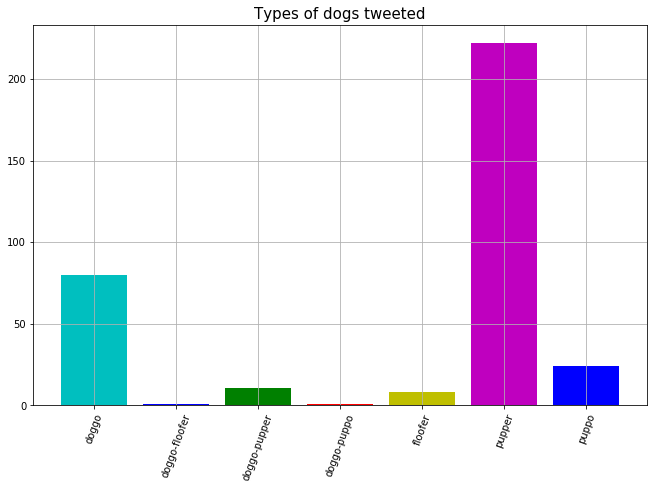

In [56]:
%matplotlib inline
Stages = df_wrangledata['DogStage'].loc[df_wrangledata['DogStage'] != ''].values
DogStages = []
for stage in Stages:
    if ',' not in stage:
        DogStages.append(stage)
    else:
        indice = stage.find(',')
        DogStages.append(stage[0:indice])
        DogStages.append(stage[indice+1:])
        DogStages.append(stage.replace(',','-'))
        
(Stages,Freq) = np.unique(DogStages,return_counts=True)

fig, ax1 = plt.subplots(figsize=(11,7))
plt.bar(Stages,Freq, color='cbgrymb');
plt.title('Types of dogs tweeted', fontsize=15);
plt.xticks(rotation=70)
plt.grid()

#### Classification of the tweeted dogs accordingly with their breeds

The following figure presents the most 15 dog breeds tweeted on WeRateDogs, based on the image-prediction file provided by Udacity.

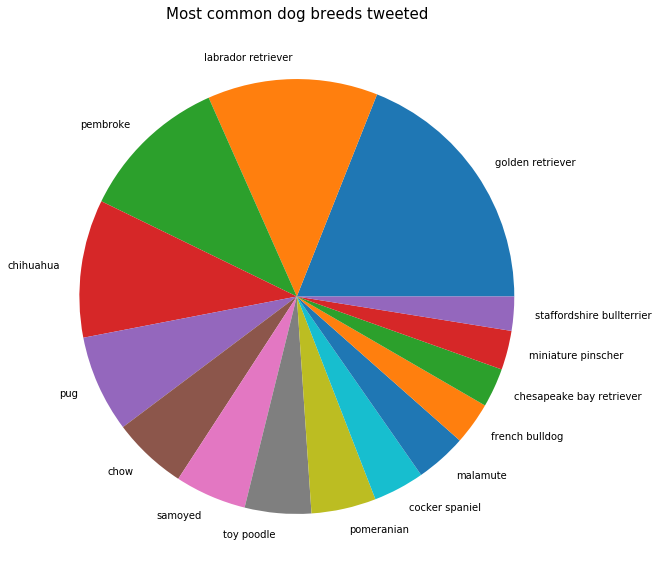

In [57]:
fig, ax1 = plt.subplots(figsize=(10,10))
P1 = df_wrangledata['1stPred'][df_wrangledata['P1Dog'] == 1].value_counts().to_dict()
keys = list(P1.keys())[0:15]
vals = [P1[key] for key in keys]
plt.pie(vals, labels = keys);
plt.title('Most common dog breeds tweeted', fontsize=15);

#### Relationship between retweets and favorites of specific tweets

It can be observed below the relationship between the 10 most retweeted tweets in WeRateDogs and how  favorites are them among Twitter users.

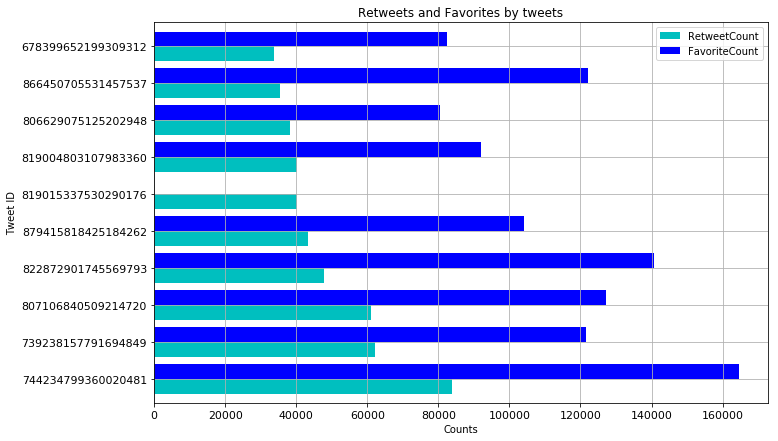

In [58]:
df_temp = df_wrangledata.sort_values(['RetweetCount'], ascending=False)
columns = ['RetweetCount', 'FavoriteCount']

df_temp.iloc[0:10].plot(x='TweetID', y=['RetweetCount','FavoriteCount'], kind='barh', color=['c', 'b'], title='Retweets and Favorites by tweets', width=.8, fontsize=11, grid=True, figsize=(11,7));
plt.ylabel('Tweet ID');
plt.xlabel('Counts');